# Mahmoud Abdelnasser

## Heart Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoder = LabelEncoder()
encoded_data = data.copy()
for col in data.select_dtypes(include='object').columns:
    encoded_data[col] = label_encoder.fit_transform(data[col])


In [5]:
# Split the data into features (X) and target (y)
X = encoded_data.drop('HeartDisease', axis=1)
y = encoded_data['HeartDisease']

In [6]:
# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((255836, 17), (63959, 17), (255836,), (63959,))

## Logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train model
log_reg.fit(X_train, y_train)

# Make predictions
log_reg_preds = log_reg.predict(X_test)

# Evaluate models
log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
log_reg_report = classification_report(y_test, log_reg_preds)

log_reg_accuracy, log_reg_report


(0.9128660548163667,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.95     58367\n           1       0.51      0.09      0.15      5592\n\n    accuracy                           0.91     63959\n   macro avg       0.71      0.54      0.55     63959\nweighted avg       0.88      0.91      0.88     63959\n')

In [9]:
accuracy = 0.9128660548163667
report = """
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.51      0.09      0.15      5592

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.88      0.91      0.88     63959
"""

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.9129
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.51      0.09      0.15      5592

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.88      0.91      0.88     63959



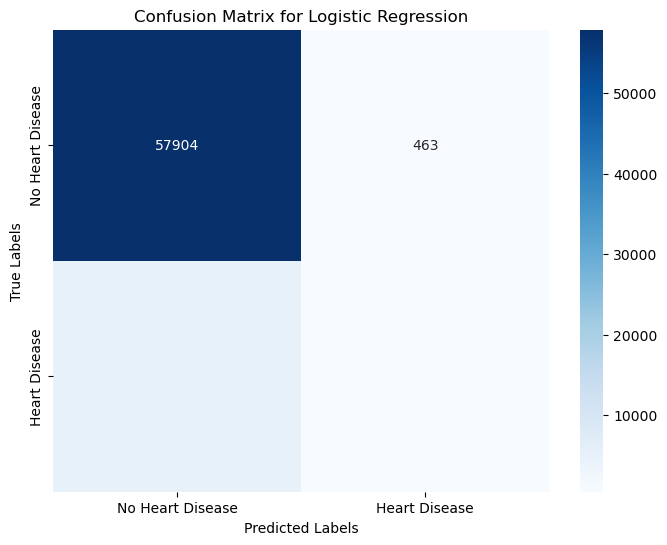

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, log_reg_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Randomm Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize models
rf_clf = RandomForestClassifier(random_state=42)

# Train model
rf_clf.fit(X_train, y_train)

# Make predictions
rf_clf_preds = rf_clf.predict(X_test)

# Evaluate models
rf_clf_accuracy = accuracy_score(y_test, rf_clf_preds)
rf_clf_report = classification_report(y_test, rf_clf_preds)

rf_clf_accuracy , rf_clf_report

(0.9040791757219468,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95     58367\n           1       0.35      0.11      0.17      5592\n\n    accuracy                           0.90     63959\n   macro avg       0.64      0.55      0.56     63959\nweighted avg       0.87      0.90      0.88     63959\n')

In [12]:
rf_accuracy = 0.9040791757219468
rf_report = """
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.35      0.11      0.17      5592

    accuracy                           0.90     63959
   macro avg       0.64      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959
"""

print(f"Accuracy: {rf_accuracy:.4f}")
print("Classification Report:")
print(rf_report)


Accuracy: 0.9041
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.35      0.11      0.17      5592

    accuracy                           0.90     63959
   macro avg       0.64      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959



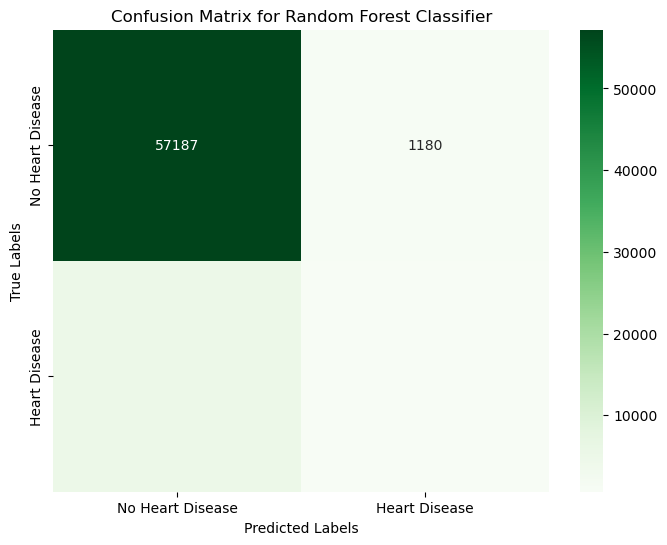

In [13]:
# Generate the confusion matrix for Random Forest model
rf_conf_matrix = confusion_matrix(y_test, rf_clf_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Comparing

In [14]:
# Reducing the dataset size for Random Forest to prevent memory errors
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Train Random Forest on the smaller subset
rf_clf.fit(X_train_small, y_train_small)

# Make predictions again
rf_clf_preds = rf_clf.predict(X_test)

# Re-evaluate Random Forest model
rf_clf_accuracy = accuracy_score(y_test, rf_clf_preds)
rf_clf_report = classification_report(y_test, rf_clf_preds)

log_reg_accuracy, rf_clf_accuracy, log_reg_report, rf_clf_report


(0.9128660548163667,
 0.9084100752044278,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.95     58367\n           1       0.51      0.09      0.15      5592\n\n    accuracy                           0.91     63959\n   macro avg       0.71      0.54      0.55     63959\nweighted avg       0.88      0.91      0.88     63959\n',
 '              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.95     58367\n           1       0.38      0.08      0.13      5592\n\n    accuracy                           0.91     63959\n   macro avg       0.65      0.53      0.54     63959\nweighted avg       0.87      0.91      0.88     63959\n')

In [15]:
# Logistic Regression Results
log_reg_accuracy = 0.9128660548163667
log_reg_report = """
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.51      0.09      0.15      5592

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.88      0.91      0.88     63959
"""

# Random Forest Results
rf_clf_accuracy = 0.9084100752044278
rf_clf_report = """
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.38      0.08      0.13      5592

    accuracy                           0.91     63959
   macro avg       0.65      0.53      0.54     63959
weighted avg       0.87      0.91      0.88     63959
"""

# Display the results
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print("Logistic Regression Classification Report:")
print(log_reg_report)

print(f"Random Forest Accuracy: {rf_clf_accuracy:.4f}")
print("Random Forest Classification Report:")
print(rf_clf_report)


Logistic Regression Accuracy: 0.9129
Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.51      0.09      0.15      5592

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.88      0.91      0.88     63959

Random Forest Accuracy: 0.9084
Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.38      0.08      0.13      5592

    accuracy                           0.91     63959
   macro avg       0.65      0.53      0.54     63959
weighted avg       0.87      0.91      0.88     63959



## K_Means

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)


In [17]:
# Fit and predict clusters on the full training set
kmeans_clusters = kmeans.fit_predict(X_train)

In [18]:
# Convert X_train to DataFrame for sampling
X_train_df = pd.DataFrame(X_train)

In [19]:
# Randomly sample a fraction of both the data and the cluster labels for quicker evaluation
sample_indices = X_train_df.sample(frac=0.1, random_state=42).index
X_train_sample = X_train_df.loc[sample_indices]
kmeans_clusters_sample = kmeans_clusters[sample_indices]

In [20]:
# Calculate silhouette score on the sample
kmeans_silhouette = silhouette_score(X_train_sample, kmeans_clusters_sample)

# Display K-Means results
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

K-Means Silhouette Score: 0.2508


## Agglomerative

In [21]:
from sklearn.cluster import AgglomerativeClustering

# Initialize Agglomerative Clustering with 2 clusters
agg_clustering = AgglomerativeClustering(n_clusters=2)


In [22]:
# Sample 10% of the dataset
X_train_sample = pd.DataFrame(X_train).sample(frac=0.1, random_state=42)

# Fit and predict on the sampled data
agg_clusters_sample = agg_clustering.fit_predict(X_train_sample)


In [23]:
# Evaluate the clustering performance using silhouette score
agg_silhouette = silhouette_score(X_train_sample, agg_clusters_sample)

In [24]:
# Display Agglomerative Clustering results
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette:.4f}")

Agglomerative Clustering Silhouette Score: 0.1997


## Comparing

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_sample)

# Define the plotting function
def plot_clusters(X_pca, clusters, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()


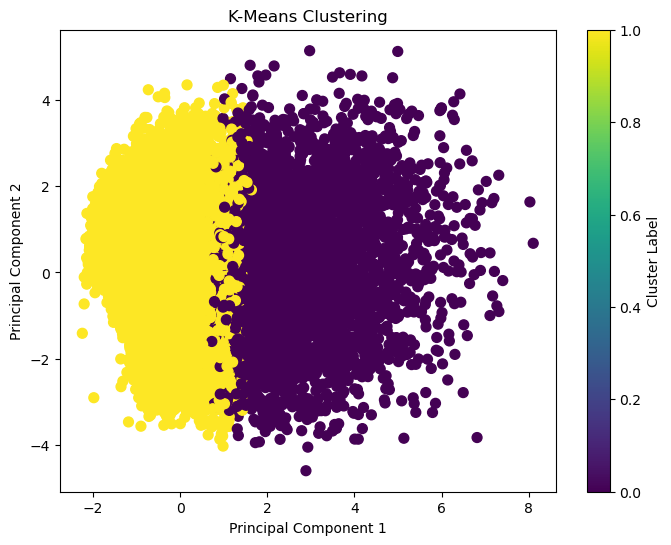

In [29]:
# Plot K-Means Clustering
plot_clusters(X_pca, kmeans_clusters_sample, 'K-Means Clustering')


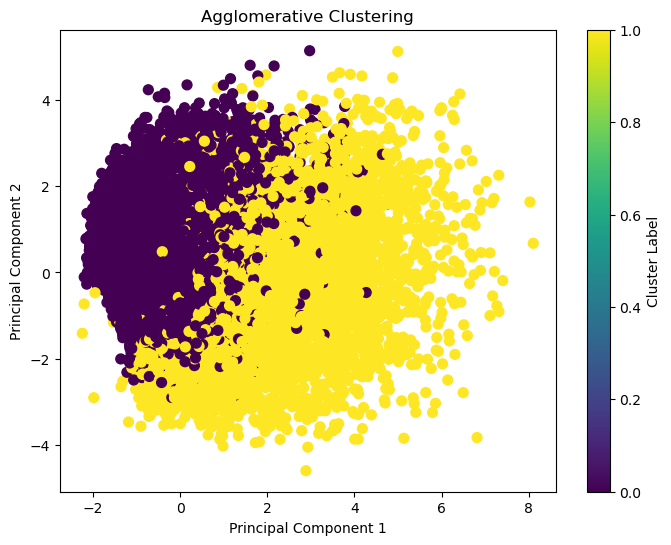

In [30]:
# Plot Agglomerative Clustering
plot_clusters(X_pca, agg_clusters_sample, 'Agglomerative Clustering')
